In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import os
import collections
import cv2
from sklearn.model_selection import train_test_split

In [5]:
data = collections.defaultdict(list)
DIR = '/content/drive/MyDrive/knee_oster/'
for i in os.listdir(DIR):
    dirs  = os.listdir(DIR + str(i)+'/'+str(i))
    print(f"Processing : {i}")
    for img in dirs:
        temp_dir = DIR + str(i)+'/'+str(i)+'/'+img
        data[i].append(cv2.resize(cv2.imread(temp_dir), (100,100)))
        

Processing : normal
Processing : osteoporosis


In [6]:
X = []
Y = []
count = 0
for i in data.keys():
    print("Images in {} ==> {}".format(i,len(data[i])))
    X += data[i]
    for _ in range(len(data[i])):
        Y.append(count)
    count += 1

Images in normal ==> 186
Images in osteoporosis ==> 186


In [7]:
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [8]:
X = np.array(X)
Y = np.array(Y)

In [9]:
Y = to_categorical(Y)

In [10]:
xtrain,xtest, ytrain, ytest = train_test_split(X,Y,test_size=.10, random_state = 0) 

In [18]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(100,100,3)))
#pooling layer
model.add(MaxPooling2D(3,3))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
# Take a look at the model summary
print(model.summary())

from tensorflow.keras.utils import plot_model
plot_model(model)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                      

In [19]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(xtrain,ytrain,epochs=30,batch_size=16,validation_data = (xtest,ytest))

Epoch 1/30
21/21 [==============================] - 5s 196ms/step - loss: 0.8007 - accuracy: 0.6168 - val_loss: 1.4708 - val_accuracy: 0.6316
Epoch 2/30
21/21 [==============================] - 4s 190ms/step - loss: 0.6069 - accuracy: 0.7156 - val_loss: 0.8054 - val_accuracy: 0.5526
Epoch 3/30
21/21 [==============================] - 4s 190ms/step - loss: 0.5366 - accuracy: 0.7395 - val_loss: 0.6735 - val_accuracy: 0.5789
Epoch 4/30
21/21 [==============================] - 4s 189ms/step - loss: 0.5253 - accuracy: 0.7635 - val_loss: 0.5745 - val_accuracy: 0.6842
Epoch 5/30
21/21 [==============================] - 4s 192ms/step - loss: 0.4713 - accuracy: 0.7904 - val_loss: 0.3318 - val_accuracy: 0.8421
Epoch 6/30
21/21 [==============================] - 4s 191ms/step - loss: 0.4420 - accuracy: 0.7904 - val_loss: 0.5098 - val_accuracy: 0.7368
Epoch 7/30
21/21 [==============================] - 4s 190ms/step - loss: 0.4422 - accuracy: 0.7904 - val_loss: 0.4711 - val_accuracy: 0.7632
Epoch 

In [21]:
model.fit(xtrain,ytrain,epochs=30,batch_size=16,validation_data = (xtest,ytest))

Epoch 1/30
21/21 [==============================] - 4s 195ms/step - loss: 0.1522 - accuracy: 0.9401 - val_loss: 0.9660 - val_accuracy: 0.7632
Epoch 2/30
21/21 [==============================] - 4s 192ms/step - loss: 0.1431 - accuracy: 0.9461 - val_loss: 0.8910 - val_accuracy: 0.7105
Epoch 3/30
21/21 [==============================] - 4s 191ms/step - loss: 0.1321 - accuracy: 0.9461 - val_loss: 0.9016 - val_accuracy: 0.6316
Epoch 4/30
21/21 [==============================] - 4s 192ms/step - loss: 0.1290 - accuracy: 0.9431 - val_loss: 1.0560 - val_accuracy: 0.6842
Epoch 5/30
21/21 [==============================] - 4s 192ms/step - loss: 0.0959 - accuracy: 0.9491 - val_loss: 0.8046 - val_accuracy: 0.7895
Epoch 6/30
21/21 [==============================] - 4s 190ms/step - loss: 0.1108 - accuracy: 0.9491 - val_loss: 1.0890 - val_accuracy: 0.6842
Epoch 7/30
21/21 [==============================] - 4s 193ms/step - loss: 0.0964 - accuracy: 0.9551 - val_loss: 1.6030 - val_accuracy: 0.6842
Epoch 

In [22]:
model.fit(xtrain,ytrain,epochs=10,batch_size=16,validation_data = (xtest,ytest))

Epoch 1/10
21/21 [==============================] - 4s 192ms/step - loss: 0.1068 - accuracy: 0.9641 - val_loss: 1.1800 - val_accuracy: 0.7105
Epoch 2/10
21/21 [==============================] - 4s 194ms/step - loss: 0.0884 - accuracy: 0.9611 - val_loss: 1.2857 - val_accuracy: 0.7105
Epoch 3/10
21/21 [==============================] - 4s 190ms/step - loss: 0.0788 - accuracy: 0.9521 - val_loss: 0.9421 - val_accuracy: 0.7105
Epoch 4/10
21/21 [==============================] - 4s 193ms/step - loss: 0.0619 - accuracy: 0.9581 - val_loss: 1.3078 - val_accuracy: 0.7105
Epoch 5/10
21/21 [==============================] - 4s 191ms/step - loss: 0.0617 - accuracy: 0.9731 - val_loss: 1.1775 - val_accuracy: 0.7368
Epoch 6/10
21/21 [==============================] - 4s 191ms/step - loss: 0.0532 - accuracy: 0.9820 - val_loss: 2.5797 - val_accuracy: 0.5789
Epoch 7/10
21/21 [==============================] - 4s 193ms/step - loss: 0.0864 - accuracy: 0.9671 - val_loss: 1.1668 - val_accuracy: 0.7632
Epoch 

In [49]:
model.save("/content/drive/MyDrive/Osteoporosis_73.h5")

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(np.argmax(ytest,axis=1),np.argmax(model.predict(xtest),axis=1)))

2/2 [==============================] - 0s 28ms/step
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        21
           1       0.67      0.71      0.69        17

    accuracy                           0.71        38
   macro avg       0.71      0.71      0.71        38
weighted avg       0.71      0.71      0.71        38



In [43]:
def names(number):
    confidence=number*100
    if number==1 and confidence>0:
        return str(confidence)+'% Confidence knee osteoporosis'
    else:
        return 'Its not a knee osteoporosis'

1/1 [==============================] - 0s 21ms/step
100% Confidence knee osteoporosis


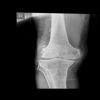

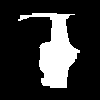

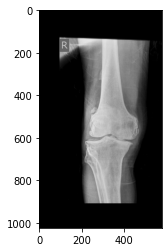

In [47]:
from matplotlib.pyplot import imshow
from PIL import Image
from google.colab.patches import cv2_imshow
img = Image.open(r"/content/drive/MyDrive/knee_oster/osteoporosis/osteoporosis/103.JPEG")
x = np.array(img.resize((100,100)))
x= x.reshape(1,100, 100, 3)
res = model.predict(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))

img_array=np.array(img.resize((100,100)))
gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY, 0.7)
cv2_imshow(gray)
(T, thresh) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
(T, threshInv) = cv2.threshold(gray, 155, 255,cv2.THRESH_BINARY_INV)
cv2_imshow(threshInv)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)

In [35]:
classification

1

1/1 [==============================] - 0s 21ms/step
Its not a knee osteoporosis


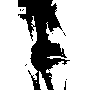

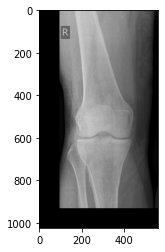

In [48]:
from matplotlib.pyplot import imshow
from PIL import Image
img = Image.open(r"/content/drive/MyDrive/knee_oster/normal/normal/115n.JPEG")
x = np.array(img.resize((100,100)))
x= x.reshape(1,100, 100, 3)
res = model.predict(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))

img_array=np.array(img.resize((100,100)))
gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY, 0.7)
cv2_imshow(gray)
(T, thresh) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
(T, threshInv) = cv2.threshold(gray, 155, 255,cv2.THRESH_BINARY_INV)
cv2_imshow(threshInv)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)